In [1]:
# For this practical example we will need the following libraries and modules
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv('IPO.csv')
data.head()


,Issuer Company,Listing Date,Issue Price,Issue Size,QIB,NII,RII,EMP,Total,Open Price,Low Price,High Price,Close Price,Change,Year
0,MSTC Limited IPO,29-Mar-19,120,212.04,1.13,2.15,2.95,1.54,1.46,111.0,110.05,116.55,114.20,-4.83,2019
1,Chalet Hotels Limited IPO,7-Feb-19,280,1641.18,4.66,1.10,0.03,NaN,1.57,291.0,250.15,295.30,290.40,3.71,2019
2,Xelpmoc Design and Tech Limited IPO,4-Feb-19,66,23.00,1.24,7.69,2.64,NaN,3.25,57.0,55.15,59.85,59.85,-9.32,2019
3,Garden Reach Shipbuilders & Engineers Limited IPO,10-Oct-18,118,344.69,1.81,0.31,0.24,0.14,1.02,104.0,95.35,109.50,105.10,-10.93,2018
4,Aavas Financiers Limited IPO,8-Oct-18,821,1734.07,2.77,0.26,0.25,NaN,0.97,758.0,710.00,787.50,773.15,-5.83,2018


In [3]:
data.describe()

,Issue Price,Issue Size,QIB,NII,RII,EMP,Total,Open Price,Low Price,High Price,Close Price,Change,Year
count,400.000000,400.000000,366.000000,373.000000,373.000000,159.000000,375.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000
mean,258.362500,691.130650,52.294617,48.941877,8.119464,1.032264,22.815493,294.127500,273.95550,331.483375,303.455675,17.775575,2011.022500
std,267.639952,1618.013118,522.822077,102.519460,13.491152,1.558048,38.569350,322.120466,314.62345,350.476124,336.128338,45.043098,3.874859
min,10.000000,6.000000,0.010000,0.020000,0.030000,0.010000,0.440000,9.500000,4.75000,9.500000,5.250000,-69.830000,2006.000000
25%,82.000000,66.082500,1.315000,1.810000,1.210000,0.335000,1.640000,89.500000,76.45000,107.037500,90.650000,-7.150000,2007.000000
50%,166.500000,166.505000,5.665000,5.110000,3.250000,0.890000,4.800000,180.000000,161.92500,204.500000,180.925000,6.025000,2010.000000
75%,328.500000,600.000000,35.387500,48.410000,8.700000,1.130000,29.340000,399.000000,355.33750,447.850000,408.912500,31.480000,2015.000000
max,1766.000000,15199.440000,9999.000000,958.070000,123.800000,16.040000,273.050000,2725.000000,2725.00000,3020.250000,2892.800000,286.250000,2019.000000


In [4]:
data = data.drop(['Issuer Company','Low Price', 'High Price', 'Close Price','Change','EMP', 'Listing Date'], axis=1)

In [5]:
data.describe()

,Issue Price,Issue Size,QIB,NII,RII,Total,Open Price,Year
count,400.000000,400.000000,366.000000,373.000000,373.000000,375.000000,400.000000,400.000000
mean,258.362500,691.130650,52.294617,48.941877,8.119464,22.815493,294.127500,2011.022500
std,267.639952,1618.013118,522.822077,102.519460,13.491152,38.569350,322.120466,3.874859
min,10.000000,6.000000,0.010000,0.020000,0.030000,0.440000,9.500000,2006.000000
25%,82.000000,66.082500,1.315000,1.810000,1.210000,1.640000,89.500000,2007.000000
50%,166.500000,166.505000,5.665000,5.110000,3.250000,4.800000,180.000000,2010.000000
75%,328.500000,600.000000,35.387500,48.410000,8.700000,29.340000,399.000000,2015.000000
max,1766.000000,15199.440000,9999.000000,958.070000,123.800000,273.050000,2725.000000,2019.000000


In [6]:
y = data['Open Price']
x1 = data.drop(['Open Price'],axis=1)

In [7]:
x1.head()

,Issue Price,Issue Size,QIB,NII,RII,Total,Year
0,120,212.04,1.13,2.15,2.95,1.46,2019
1,280,1641.18,4.66,1.10,0.03,1.57,2019
2,66,23.00,1.24,7.69,2.64,3.25,2019
3,118,344.69,1.81,0.31,0.24,1.02,2018
4,821,1734.07,2.77,0.26,0.25,0.97,2018


In [8]:
data.isnull().sum()

Issue Price     0
Issue Size      0
QIB            34
NII            27
RII            27
Total          25
Open Price      0
Year            0
dtype: int64

In [9]:
data=data.dropna(axis=0)

In [10]:
data.describe(include='all')

,Issue Price,Issue Size,QIB,NII,RII,Total,Open Price,Year
count,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000
mean,277.642857,733.712363,52.549121,50.107665,8.233352,23.441181,316.357830,2011.236264
std,272.702613,1659.343851,524.248921,103.509901,13.636770,38.976427,329.057191,3.907921
min,10.000000,14.000000,0.010000,0.030000,0.030000,0.440000,9.500000,2007.000000
25%,100.000000,80.992500,1.325000,1.840000,1.180000,1.730000,104.000000,2008.000000
50%,180.500000,214.180000,5.665000,5.535000,3.160000,5.040000,200.000000,2010.000000
75%,362.500000,619.310000,35.492500,49.112500,9.025000,30.892500,411.612500,2015.000000
max,1766.000000,15199.440000,9999.000000,958.070000,123.800000,273.050000,2725.000000,2019.000000


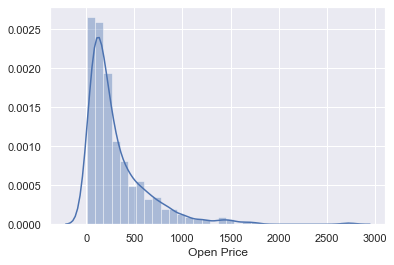

In [12]:
sns.distplot(data['Open Price'])

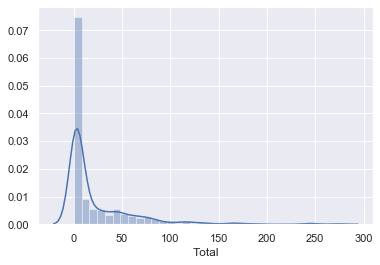

In [13]:
sns.distplot(data['Total'])

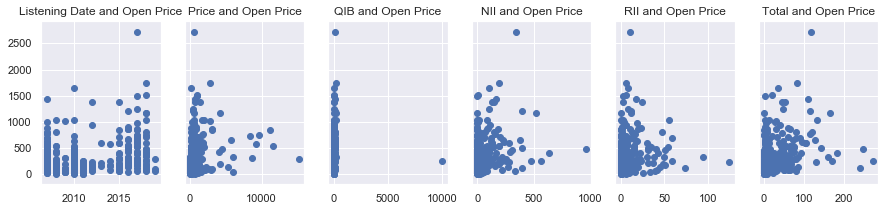

In [14]:
f, (ax1, ax2, ax3, ax4, ax5, ax6 ) = plt.subplots(1, 6, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y
ax1.scatter(data['Year'],data['Open Price'])
ax1.set_title('Listening Date and Open Price')

ax2.scatter(data['Issue Size'],data['Open Price'])
ax2.set_title('Price and Open Price')

ax3.scatter(data['QIB'],data['Open Price'])
ax3.set_title('QIB and Open Price')

ax4.scatter(data['NII'],data['Open Price'])
ax4.set_title('NII and Open Price')

ax5.scatter(data['RII'],data['Open Price'])
ax5.set_title('RII and Open Price')

ax6.scatter(data['Total'],data['Open Price'])
ax6.set_title('Total and Open Price')


plt.show()

# Multicollinearity

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
data.columns.values

array(['Issue Price', 'Issue Size', 'QIB', 'NII', 'RII', 'Total',
       'Open Price', 'Year'], dtype=object)

In [24]:
variables = data[['Issue Price', 'Issue Size','QIB','RII', 'Total']]
# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
vif = pd.DataFrame()

variables.head()

,Issue Price,Issue Size,QIB,RII,Total
0,120,212.04,1.13,2.95,1.46
1,280,1641.18,4.66,0.03,1.57
2,66,23.00,1.24,2.64,3.25
3,118,344.69,1.81,0.24,1.02
4,821,1734.07,2.77,0.25,0.97


In [25]:
variables.describe()

,Issue Price,Issue Size,QIB,RII,Total
count,364.000000,364.000000,364.000000,364.000000,364.000000
mean,277.642857,733.712363,52.549121,8.233352,23.441181
std,272.702613,1659.343851,524.248921,13.636770,38.976427
min,10.000000,14.000000,0.010000,0.030000,0.440000
25%,100.000000,80.992500,1.325000,1.180000,1.730000
50%,180.500000,214.180000,5.665000,3.160000,5.040000
75%,362.500000,619.310000,35.492500,9.025000,30.892500
max,1766.000000,15199.440000,9999.000000,123.800000,273.050000


In [26]:
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

,VIF,Features
0,1.610146,Issue Price
1,1.274678,Issue Size
2,1.216699,QIB
3,2.466143,RII
4,3.119191,Total


In [27]:
data_no_multicollinearity = data.drop(['NII'],axis=1)

In [28]:
data_no_multicollinearity.head()

,Issue Price,Issue Size,QIB,RII,Total,Open Price,Year
0,120,212.04,1.13,2.95,1.46,111.0,2019
1,280,1641.18,4.66,0.03,1.57,291.0,2019
2,66,23.00,1.24,2.64,3.25,57.0,2019
3,118,344.69,1.81,0.24,1.02,104.0,2018
4,821,1734.07,2.77,0.25,0.97,758.0,2018


# Data with Dummies

In [29]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True)

In [30]:
data_with_dummies.head()

,Issue Price,Issue Size,QIB,RII,Total,Open Price,Year
0,120,212.04,1.13,2.95,1.46,111.0,2019
1,280,1641.18,4.66,0.03,1.57,291.0,2019
2,66,23.00,1.24,2.64,3.25,57.0,2019
3,118,344.69,1.81,0.24,1.02,104.0,2018
4,821,1734.07,2.77,0.25,0.97,758.0,2018


In [31]:
data_preprocessed = data_with_dummies

In [32]:
targets = data_preprocessed['Open Price']
inputs = data_preprocessed.drop(['Open Price'], axis=1)

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
Scaler = StandardScaler()

In [35]:
Scaler.fit(inputs)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [36]:
input_scaled=Scaler.transform(inputs)

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
x_train,x_test, y_train,y_test = train_test_split(input_scaled, targets, test_size=0.2, random_state=376)

In [39]:
x_train, y_train

(array([[ 1.70225548e-01, -3.06996399e-01, -5.16287671e-02,
         -3.50517173e-01, -1.92719215e-01, -3.16783603e-01],
        [-8.79979528e-01, -4.19846667e-01, -9.91715644e-02,
         -5.06193198e-01, -5.71930902e-01, -8.29269075e-01],
        [-2.80649209e-02, -3.76396296e-01, -1.33691356e-02,
          3.09638499e+00,  1.17254562e+00, -1.08551181e+00],
        ...,
        [-6.22936328e-01, -4.21132074e-01,  1.89988790e+01,
          3.72202637e+00,  6.41291200e+00,  1.47691555e+00],
        [ 5.96182852e-01, -1.53338991e-01, -6.75973402e-02,
         -5.08396160e-01, -3.20921540e-01, -8.29269075e-01],
        [-6.30280419e-01, -3.66016486e-01, -8.68704147e-02,
         -3.54923099e-01, -4.75586469e-01,  1.95701870e-01]]), 182     333.55
 262      35.00
 343     472.50
 42      399.00
 296     399.70
 384     500.00
 102     295.00
 280      93.45
 23     1520.00
 206      28.00
 39     1250.00
 304     400.00
 272     151.00
 297     701.10
 1       291.00
 293     801.00
 70 

In [44]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((291, 6), (73, 6), (291,), (73,))

# Create the Regression

In [45]:
reg = LinearRegression()

In [46]:
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
y_hat = reg.predict(x_train)

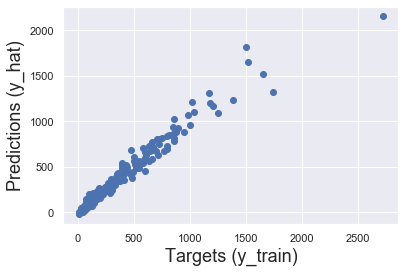

In [48]:
# The simplest way to compare the targets (y_train) and the predictions (y_hat) is to plot them on a scatter plot
# The closer the points to the 45-degree line, the better the prediction
plt.scatter(y_train, y_hat)
# Let's also name the axes
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)

plt.show()

Text(0.5, 1.0, 'Residuals PDF')

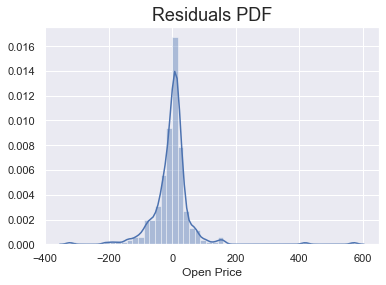

In [49]:
sns.distplot(y_train - y_hat)

# Include a title
plt.title("Residuals PDF", size=18)


In [50]:
reg.score(x_train,y_train)

0.9618628194089115

In [51]:
reg.intercept_

318.459930299803

In [52]:
reg.coef_

array([309.58468019,  -7.18453144, -14.62463187,   1.19290082,
        67.5669913 , -13.32228523])

In [53]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary.head()

,Features,Weights
0,Issue Price,309.584680
1,Issue Size,-7.184531
2,QIB,-14.624632
3,RII,1.192901
4,Total,67.566991


# Testing

In [57]:
y_hat_test = reg.predict(x_test)

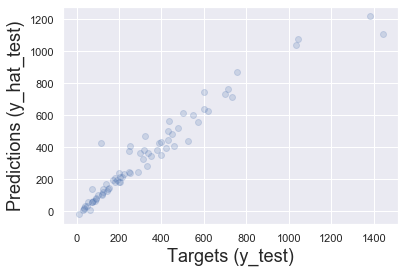

In [58]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.show()

In [59]:
pf_df = pd.DataFrame(y_hat_test, columns=['Prediction'])
pf_df.head()

,Prediction
0,180.437880
1,-19.860353
2,138.213804
3,55.461541
4,349.738478


In [60]:
pf_df.head()

,Prediction
0,180.437880
1,-19.860353
2,138.213804
3,55.461541
4,349.738478


In [61]:
pf_df['Target'] = (y_test)
pf_df.head()

,Prediction,Target
0,180.437880,NaN
1,-19.860353,NaN
2,138.213804,NaN
3,55.461541,NaN
4,349.738478,758.0


In [62]:
y_test = y_test.reset_index(drop=True)
y_test.head()

0    204.90
1     10.10
2    150.00
3     56.25
4    400.00
Name: Open Price, dtype: float64

In [63]:
pf_df['Target'] = (y_test)
pf_df.head()

,Prediction,Target
0,180.437880,204.90
1,-19.860353,10.10
2,138.213804,150.00
3,55.461541,56.25
4,349.738478,400.00


In [64]:
pf_df['Residuals'] = pf_df['Prediction'] - pf_df['Target']
pf_df['Residuals %'] = np.absolute((pf_df['Prediction'] - pf_df['Target'])/pf_df['Target']*100)

In [65]:
pf_df.head()

,Prediction,Target,Residuals,Residuals %
0,180.437880,204.90,-24.462120,11.938565
1,-19.860353,10.10,-29.960353,296.637159
2,138.213804,150.00,-11.786196,7.857464
3,55.461541,56.25,-0.788459,1.401705
4,349.738478,400.00,-50.261522,12.565380


In [72]:
pd.options.display.max_rows = 999
# Moreover, to make the dataset clear, we can display the result with only 2 digits after the dot 
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# Finally, we sort by difference in % and manually check the model
pf_df.sort_values(by=['Residuals %'])
pf_df.describe()

,Prediction,Target,Residuals,Residuals %
count,73.00,73.00,73.00,73.00
mean,341.56,331.08,10.48,24.80
std,284.66,293.70,76.55,48.32
min,-19.86,10.10,-338.50,0.33
25%,127.73,120.00,-19.01,4.27
50%,245.94,246.00,0.71,11.94
75%,471.98,435.00,33.76,22.46
max,1216.58,1443.75,312.12,296.64


In [74]:
final_summary = pf_df.extend(x_test)

AttributeError: 'DataFrame' object has no attribute 'extend'

In [85]:
pf_df.to_csv('Test.csv')



In [87]:
pf_df.shape

(73, 4)

In [93]:
type(pf_df)
#type(x_test)

pandas.core.frame.DataFrame